# Classifying spam and ham messages
<a href="">Link to my blog post on my website where I explainy my thought process, challenges and what I lerned</a>
<br>
# Steps
### These are some of the things that I did in this notebook
1. Imports
2. Importing and formating data
3. Importing my algorithms
4. Testing my many variations of my algorithms

-----
# Part 1
## The imports
Becuase I am not using any machine learning libraries my only import is pandas. 
<br>
#### Why import pandas?
Importing Pandas will allow us to store the training data and test data in a pandas dataframe which will make it 

In [2]:
import pandas as pd

----
# Part 2 
## Importing the data
I downloaded my data from the UC Irvine Machine Learning repository.
<br>
I have them as 2 csv files (one for the train data and the other for the test data)
<br>
I can access them and make them into a data frame using pandas

In [2]:
! ls data/

test  train


In [4]:
# Storing the data in a pandas data frame.
train_data = pd.read_csv("data/train", sep="\t", names=["true_category", "message", "label_num"])

In [4]:
#### This is used to get spam as 1 and ham as 0 so we can use it later
for i in range(len(train_data)):
    label = train_data['true_category'][i]
    if label == 'spam':
        train_data.loc[i,"label_num"]=int(1)
    else:
        train_data.loc[i,"label_num"]=int(0)

In [5]:

train_data.astype({'label_num': 'int64'}).dtypes

true_category    object
message          object
label_num         int64
dtype: object

In [6]:
train_data 

,true_category,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0.0
1,ham,Ok lar... Joking wif u oni...,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0
...,...,...,...
4569,ham,hiya hows it going in sunny africa? hope u r a...,0.0
4570,ham,At WHAT TIME should i come tomorrow,0.0
4571,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...,1.0
4572,ham,"CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & ...",0.0


<!-- - add a new columns to `df` called `predicted_category` -->
<!-- - for each row in `df`, if `df["predicted_category"] == df["true_category"]` then you were correct! -->
<!-- - for example, if the number of columns that match is 4400, then the accuracy is 4400/4573 -->
----

# Part 3 
This next part is where I imported my fucntions/algorithms and tested them.
First I import them and later on will be the results of that algorithm

In [7]:
# Version 2
from version_two import train_func as set_v2
from version_two import test_func as alg_v2
# Version 3
from version_three import train_func as set_v3
from version_three import driver_func as alg_v3
# Version 4
from version_four import train_func as set_v4
from version_four import driver_func as alg_v4
from version_four import test_func as alg_v5

------
# Setting the data
This function was used to set the data in dictionary form. This function is also used by all the different algorithms 

In [8]:
# Function to set words into a dictionary
def set_data(algorithm, data):
    """
    This function uses the training data set to pass in the labels and 
    messages to another function which will create a dictionary that
    looks like this.
    dict = {
        'how': {'spam': 10, 'ham': 450},
        'free': {'spam': 154, 'ham': 50},
    }
    The point of this is to see what the probability of a word being in a
    spam labeled message and the word being in a ham labeled message. Once 
    we have that we can run our classifier algorithm. 
    """
    for i in range(len(train_data)):
        # get the message 
        sms = data['message'][i]
        # get real label
        label = data['true_category'][i]
        # call function
        algorithm(label, sms)

In [9]:
# Getting a score but not really sure how this works
def get_f1_score(correct_ham, correct_spam, incorrect_ham, incorrect_spam):
    """
    """
    all_incorrect = (incorrect_ham+incorrect_spam)
    all_correct = (correct_ham+correct_spam)
    precision = (all_correct)/(all_correct+all_incorrect)
    recall = (all_correct)/(all_correct+all_incorrect)
    
    score = (2*((precision*recall)/(precision+recall)))
    precision_ham = (correct_ham)/(correct_ham+incorrect_ham)
    precision_spam = (correct_spam)/(correct_spam+incorrect_spam)
    recall_ham = (correct_ham)/(correct_ham+incorrect_ham) 
    recall_spam = (correct_spam)/(correct_spam+incorrect_spam) 

    
    ham_score = 2 * ((precision_ham * recall_ham)/(precision_ham+recall_ham))
    spam_score = 2 * ((precision_spam * recall_spam)/(precision_spam+recall_spam))
    
    print("f1: ", +score)
    print('all correct/2: ',+ (ham_score+spam_score)/2)

# Testing Accuracy
Here is my function that I used to test all my algorithm versions. The function would take in a function which was my algorithm and the data. This prints the results so we can see them. I ran all my algorithms through this function and we can see all the results below

In [10]:
# This function can be used test a functions accuracy
def get_accuracy(algorithm, data):
    """
    This functon has to run after the set_data function and will determine
    the accuracy of the algorithm. 
    
    Since we now have our dictonary with the training data inputed in. We
    can now pass in the test data into our algorithm which will return 
    ham or spam.
    
    This function accepts an algorithm and a dataset and produces metrics
    which show how good the algorithm is. For instance, it prints the percentage
    of spam texts that were accurately identified as spam.
    
    https://en.wikipedia.org/wiki/F1_score
    RMSE
    """
    # ammount correct for each label
    correct_ham = 0
    correct_spam = 0
    correct = 0
    
    spam = len(data.groupby(['true_category']).get_group('spam'))
    ham = len(data.groupby(['true_category']).get_group('ham'))
    
    
    len_of_data = len(data)

    for i in range(len(data)):
        # get the message and label 
        sms = data['message'][i]
        label = data['true_category'][i]
        
        # call function
        prediction = algorithm(sms)

        
        if prediction == label:
            # If prediction is correct we add 1
            correct += 1
            if prediction == 'spam':
                # If the predicted label is spam and acutal label
                # is spam then we add to amount correct for spam
                correct_spam +=1
            elif prediction =='ham':
                # If the predicted label is ham and acutal label
                # is spam then we add to amount correct for ham
                correct_ham +=1
    
    incorrect_ham = ham-correct_ham
    incorrect_spam = spam-correct_spam
    # get_f1_score(correct_ham, correct_spam, incorrect_ham, incorrect_spam)
    print((correct_ham+correct_spam)/2)
    print('Correct Ham: ', + correct_ham/ham)
    print('Correct Spam: ', + correct_spam/spam)
    print('Correct: ', + correct/len_of_data)

    


# The Results

In [11]:
# Setting the training data
set_data(set_v2, train_data)

In [12]:
# Testing the accuracy
get_accuracy(alg_v2, train_data)

2174.0
Correct Ham:  0.9992424242424243
Correct Spam:  0.6368078175895765
Correct:  0.9505902929602099


In [13]:
# Setting the data
set_data(set_v3, train_data)

In [14]:
# Test the acurracy
get_accuracy(alg_v3, train_data)

1901.5
Correct Ham:  0.8282828282828283
Correct Spam:  0.8517915309446255
Correct:  0.8314385658067337


# Graphing the data
Here I graphed to training data to see if there were any patterns I could use to get help me.
<br>
I got every words spam and ham value from the dictioanry of probabilites we created.
<br>
Once we had their spam and ham values the ham was represented by x and spam with y.
<br>
<!-- To differentiate on the graph if the label -->

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [16]:
set_data(set_v4, train_data)
ham_points = {}
spam_points = {}
def get_points():
    for i in range(len(train_data)):
        sms = train_data['message'][i]
        label = train_data['true_category'][i]
        ham, spam =  alg_v4(sms)
        if label == 'spam':
            spam_points[i] = {'x' : ham, 'y' : spam}
        else:
            ham_points[i] = {'x' : ham, 'y' : spam}  

In [17]:
get_points()

In [18]:
# graph each message using their words 
# example sms = [0, 1, 0, 1, 1, 0, 1]
# add up that and see where it aligns
# weather all zeroes are a x and all ones are a y
# or graph decimal points from -1 to 1

In [19]:
spam_x = []
spam_y = []
for key in spam_points:
    val = key
    x = spam_points[val]['x']
    y = spam_points[val]['y']
    spam_x.append(x)
    spam_y.append(y)

In [20]:
ham_x = []
ham_y = []
for key in ham_points:
    val = key
    x = ham_points[val]['x']
    y = ham_points[val]['y']
    ham_x.append(x)
    ham_y.append(y)

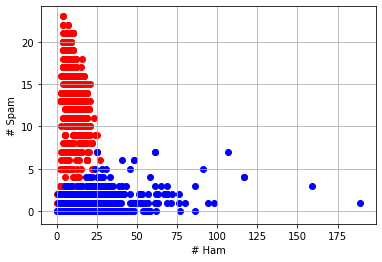

In [21]:
# %matplotlib inline 
plt.scatter(spam_x, spam_y, color='r')
plt.scatter(ham_x, ham_y, color='b')
plt.xlabel('# Ham')
plt.ylabel('# Spam')
plt.grid(True)
plt.show();

In [22]:
#### Algorithm results
get_accuracy(alg_v5, train_data)

2264.5
Correct Ham:  0.9959595959595959
Correct Spam:  0.9527687296416938
Correct:  0.990161783996502


# Importing Sklearn library to make model
blah blah my comments

In [23]:
# ML library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [24]:
x = train_data.message

In [25]:
y = train_data.label_num

In [26]:
vectorizer = CountVectorizer()

In [27]:
counts = vectorizer.fit_transform(x.values)

In [28]:
classifier = MultinomialNB()

In [29]:
targets = y.values

In [30]:
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
examples = x
example_count = vectorizer.transform(examples)
predictions = classifier.predict(example_count)
predictions

array([0., 0., 1., ..., 1., 0., 0.])

In [32]:
def get_acuraccy_naive_byes():
    """
    This functions prints sesults of the sk
    """
    correct = 0
    incorrect = 0
    s_correct = 0
    h_correct = 0
    spam = len(train_data.groupby(['true_category']).get_group('spam'))
    ham = len(train_data.groupby(['true_category']).get_group('ham'))
    len_of_data = len(train_data)
    for i in range(len(predictions)):
        prediction = predictions[i]
        real_label = train_data['label_num'][i]
        if int(prediction) == int(real_label):
            # If prediction is correct we add 1
            correct += 1
            if int(prediction) == 1:
                # If the predicted label is spam and acutal label
                # is spam then we add to amount correct for spam
                 s_correct += 1
            elif int(prediction) == 0:
                # If the predicted label is ham and acutal label
                # is spam then we add to amount correct for ham
                h_correct += 1
        elif int(prediction) != int(real_label):
            incorrect +=1
            
    print("incorrect", +incorrect/len_of_data)
    print((s_correct+h_correct)/2)
    print('Correct Ham: ', + h_correct/ham)
    print('Correct Spam: ', + s_correct/spam)
    print('Correct: ', + correct/len_of_data)

In [33]:
get_acuraccy_naive_byes()

incorrect 0.006996064713598601
2271.0
Correct Ham:  0.996969696969697
Correct Spam:  0.9674267100977199
Correct:  0.9930039352864014


In [34]:
#### Getting test data
test_data = pd.read_csv("data/test", sep="\t", names=["true_category", "message", "label_num"])

In [35]:
### Algorithm results with test data
get_accuracy(alg_v5, test_data)

488.5
Correct Ham:  0.9907514450867052
Correct Spam:  0.9022556390977443
Correct:  0.9789579158316634


In [36]:
from version_four import get_dict

In [37]:
# get_dict()